The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie"; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. 
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

# 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Read the CSV file and prepare the DF
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/vehicle.csv") 
print(data.shape)

Mounted at /content/gdrive
(846, 19)


In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [36]:
#Find the missing value.
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
pd.DataFrame((zip(data.columns, data.isna().sum(), data.isnull().sum())), columns=['Features', 'Count_NA', 'Count_NULL']).sort_values('Count_NA', ascending=False)

Features  Count_NA  Count_NULL
3                  radius_ratio         6           6
14               skewness_about         6           6
1                   circularity         5           5
2          distance_circularity         4           4
13  scaled_radius_of_gyration.1         4           4
8        pr.axis_rectangularity         3           3
10              scaled_variance         3           3
4          pr.axis_aspect_ratio         2           2
11            scaled_variance.1         2           2
12    scaled_radius_of_gyration         2           2
16             skewness_about.2         1           1
6                 scatter_ratio         1           1
7                 elongatedness         1           1
15             skewness_about.1         1           1
0                   compactness         0           0
17                hollows_ratio         0           0
9     max.length_rectangularity         0           0
5       max.length_aspect_ratio         0           0
18                        class         0           0

Missing values found in the features. Needs analysis and treatment

In [37]:
#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for cls in data.items():
    print(cls[0], "-", cls[1].nunique(), "values with ", cls[1].isnull().sum(), "null / na values")
    print("    ", np.sort(cls[1].unique()))


Number of unique values of other attributes
compactness - 44 values with  0 null / na values
     [ 73  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 119]
circularity - 27 values with  5 null / na values
     [33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.
 51. 52. 53. 54. 55. 56. 57. 58. 59. nan]
distance_circularity - 63 values with  4 null / na values
     [ 40.  42.  44.  47.  49.  50.  51.  52.  53.  54.  55.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  98. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 112.  nan]
radius_ratio - 134 values with  6 null / na values
     [104. 105. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 121. 122. 123. 124. 125. 126. 127. 

In [38]:
#print all the data containing nan for check
data[data.isna().any(axis=1)].shape

(33, 19)

In [39]:
#Check the % of NANs in each class and to decide on a treatment method
(data[data.isna().any(axis=1)]['class'].value_counts()/data['class'].value_counts())*100

car    3.729604
bus    5.963303
van    2.010050
Name: class, dtype: float64

In [40]:
rows_with_null = pd.DataFrame(data.isnull().sum(axis=1), columns=['NA_Count']).reset_index().sort_values(['NA_Count', 'index'], ascending=[False, True])
rows_with_null = rows_with_null[rows_with_null['NA_Count']>0]
rows_with_null

index  NA_Count
105    105         3
66      66         2
118    118         2
207    207         2
222    222         2
249    249         2
266    266         2
5        5         1
9        9         1
19      19         1
35      35         1
70      70         1
77      77         1
78      78         1
141    141         1
159    159         1
177    177         1
192    192         1
215    215         1
237    237         1
273    273         1
285    285         1
287    287         1
308    308         1
319    319         1
329    329         1
345    345         1
372    372         1
396    396         1
419    419         1
467    467         1
496    496         1
522    522         1

In [41]:
#Print all the rows with NAN and see if value can bde updated
data[data.isna().any(axis=1)]

compactness  circularity  ...  hollows_ratio  class
5            107          NaN  ...            183    bus
9             93         44.0  ...            204    car
19           101         56.0  ...            193    car
35           100         46.0  ...            200    van
66            81         43.0  ...            184    bus
70            96         55.0  ...            193    car
77            86         40.0  ...            185    car
78           104         52.0  ...            191    bus
105          108          NaN  ...            199    car
118           85          NaN  ...            184    bus
141           81         42.0  ...            182    bus
159           91         45.0  ...            198    car
177           89         44.0  ...            198    bus
192           93         43.0  ...            194    car
207           85         42.0  ...            182    bus
215           90         39.0  ...            191    car
222          100         50.0  ...            198    bus
237           85         45.0  ...            184    bus
249           85         34.0  ...            189    car
266           86          NaN  ...            183    bus
273           96         45.0  ...            207    van
285           89         48.0  ...            201    car
287           88         43.0  ...            196    van
308          109         51.0  ...            202    car
319          102         51.0  ...            186    bus
329           89         38.0  ...            197    car
345          101         54.0  ...            185    bus
372           97         47.0  ...            202    van
396          108          NaN  ...            181    bus
419           93         34.0  ...            206    car
467           96         54.0  ...            194    car
496          106         55.0  ...            201    car
522           89         36.0  ...            204    car

[33 rows x 19 columns]

In [42]:
#get the stats of each group to see if they can be used to update with NAs and check the 50% and std
columns_with_na = pd.DataFrame((zip(data.columns, data.isna().sum())), columns=['Features', 'Count_NA']).sort_values('Count_NA', ascending=False)
columns_with_na = np.array(columns_with_na[columns_with_na['Count_NA']>0]['Features'])
grouped_data = data[~data.isna().any(axis=1)].groupby(['class'])
for col in columns_with_na:
    print("\n**********************************\n", col, "\n", grouped_data.describe()[col][['count', 'std', '50%', 'mean']])


**********************************
 radius_ratio 
        count        std    50%        mean
class                                     
bus    205.0  30.342470  169.0  166.585366
car    413.0  31.146595  187.0  180.832930
van    195.0  30.093456  143.0  146.887179

**********************************
 skewness_about 
        count       std  50%      mean
class                                
bus    205.0  3.188709  4.0  4.731707
car    413.0  5.537970  6.0  7.133172
van    195.0  4.634474  6.0  6.400000

**********************************
 circularity 
        count       std   50%       mean
class                                  
bus    205.0  4.938663  44.0  44.892683
car    413.0  7.010804  47.0  46.079903
van    195.0  4.093618  42.0  42.005128

**********************************
 distance_circularity 
        count        std   50%       mean
class                                   
bus    205.0  11.655427  72.0  76.482927
car    413.0  16.314312  94.0  89.031477
van    195.0  

In [43]:
grouped_data.corr()

compactness  ...  hollows_ratio
class                                           ...               
bus   compactness                     1.000000  ...       0.183990
      circularity                     0.576793  ...      -0.425480
      distance_circularity            0.810351  ...      -0.115495
      radius_ratio                    0.673579  ...       0.492100
      pr.axis_aspect_ratio           -0.043811  ...       0.514359
      max.length_aspect_ratio        -0.206402  ...      -0.115582
      scatter_ratio                   0.850098  ...      -0.226321
      elongatedness                  -0.900699  ...       0.033125
      pr.axis_rectangularity          0.833334  ...      -0.252164
      max.length_rectangularity       0.539484  ...      -0.482248
      scaled_variance                 0.823508  ...      -0.245296
      scaled_variance.1               0.855165  ...      -0.213286
      scaled_radius_of_gyration       0.490402  ...      -0.519461
      scaled_radius_of_gyration.1    -0.093058  ...      -0.806807
      skewness_about                  0.210005  ...      -0.009166
      skewness_about.1                0.320098  ...       0.020119
      skewness_about.2                0.384324  ...       0.951772
      hollows_ratio                   0.183990  ...       1.000000
car   compactness                     1.000000  ...       0.519361
      circularity                     0.776230  ...       0.247229
      distance_circularity            0.818155  ...       0.478194
      radius_ratio                    0.782374  ...       0.559651
      pr.axis_aspect_ratio            0.396917  ...       0.256425
      max.length_aspect_ratio         0.816660  ...       0.486225
      scatter_ratio                   0.850279  ...       0.361064
      elongatedness                  -0.837553  ...      -0.437990
      pr.axis_rectangularity          0.845187  ...       0.332127
      max.length_rectangularity       0.784012  ...       0.280555
      scaled_variance                 0.828579  ...       0.387007
      scaled_variance.1               0.851608  ...       0.343923
      scaled_radius_of_gyration       0.682121  ...       0.124246
      scaled_radius_of_gyration.1    -0.313908  ...      -0.885062
      skewness_about                  0.210925  ...       0.051831
      skewness_about.1                0.012991  ...       0.249702
      skewness_about.2                0.290442  ...       0.909573
      hollows_ratio                   0.519361  ...       1.000000
van   compactness                     1.000000  ...       0.090904
      circularity                     0.218910  ...      -0.000007
      distance_circularity            0.396478  ...       0.325928
      radius_ratio                    0.160460  ...       0.373162
      pr.axis_aspect_ratio            0.022110  ...       0.255715
      max.length_aspect_ratio         0.014439  ...       0.063351
      scatter_ratio                   0.306876  ...       0.087363
      elongatedness                  -0.306778  ...      -0.219592
      pr.axis_rectangularity          0.298986  ...       0.030252
      max.length_rectangularity       0.293338  ...       0.023835
      scaled_variance                 0.212284  ...       0.049584
      scaled_variance.1               0.301203  ...       0.132964
      scaled_radius_of_gyration       0.074105  ...      -0.117140
      scaled_radius_of_gyration.1    -0.132760  ...      -0.650729
      skewness_about                  0.206848  ...       0.036683
      skewness_about.1                0.031189  ...       0.039624
      skewness_about.2                0.149708  ...       0.891758
      hollows_ratio                   0.090904  ...       1.000000

[54 rows x 18 columns]

3 options
1. Number of rows that are missing represent only 3% of the total given data. Even the worst case in class bus is ~6%. Drop the rows with nan
2. Update with the 50% value within the class for the nan
3. High correlaton seen between variables. We can use any prediction algorithm like linear regression to find the value and use it for the missing values

Conclusion:
In this case there are rows with multiple NaNs. So prediction is tedious especially considering the small % of rows it is not worth
1. Drop the row which has more than 2 nans 
2. Update the mean for nan within the given class for the rest. Not much difference caused by outliers. Mean and 50% are nearly the same

In [44]:
#drop rows with more than 2 NANs
data.drop(np.array(rows_with_null[rows_with_null['NA_Count'] > 1]['index']), inplace=True)
data.shape

(839, 19)

In [0]:
#fill the nan with the groupwise mean value
for col in data.columns[data.isnull().any()]:
    data[col] = data.groupby('class')[col].apply(lambda x: x.fillna(x.median()))

In [46]:
#ensure that there is no nans in the the data
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [47]:
data['class'].value_counts()

car    427
bus    213
van    199
Name: class, dtype: int64

In [48]:
#Encode the class variable to ensure that it is also number
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['class'] = le.fit_transform(data['class'])
le.classes_

array(['bus', 'car', 'van'], dtype=object)

In [49]:
#Ensuring all the features are numeric and does not have null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 845
Data columns (total 19 columns):
compactness                    839 non-null int64
circularity                    839 non-null float64
distance_circularity           839 non-null float64
radius_ratio                   839 non-null float64
pr.axis_aspect_ratio           839 non-null float64
max.length_aspect_ratio        839 non-null int64
scatter_ratio                  839 non-null float64
elongatedness                  839 non-null float64
pr.axis_rectangularity         839 non-null float64
max.length_rectangularity      839 non-null int64
scaled_variance                839 non-null float64
scaled_variance.1              839 non-null float64
scaled_radius_of_gyration      839 non-null float64
scaled_radius_of_gyration.1    839 non-null float64
skewness_about                 839 non-null float64
skewness_about.1               839 non-null float64
skewness_about.2               839 non-null float64
hollows_ratio    

Check for outliers in data and see how to treat them

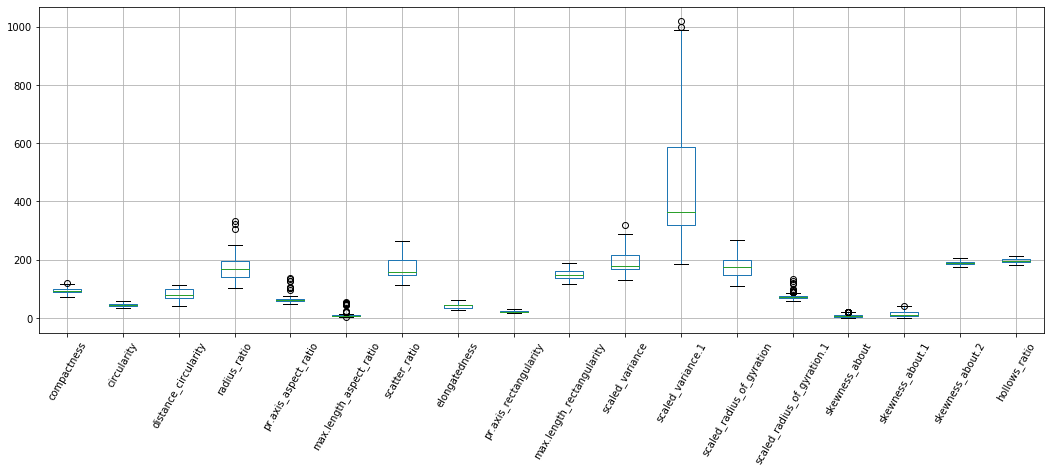

In [50]:
#unscaled box plot
plt.figure(figsize=(18,6))
data.drop('class', axis=1).boxplot(rot=60)
plt.show()

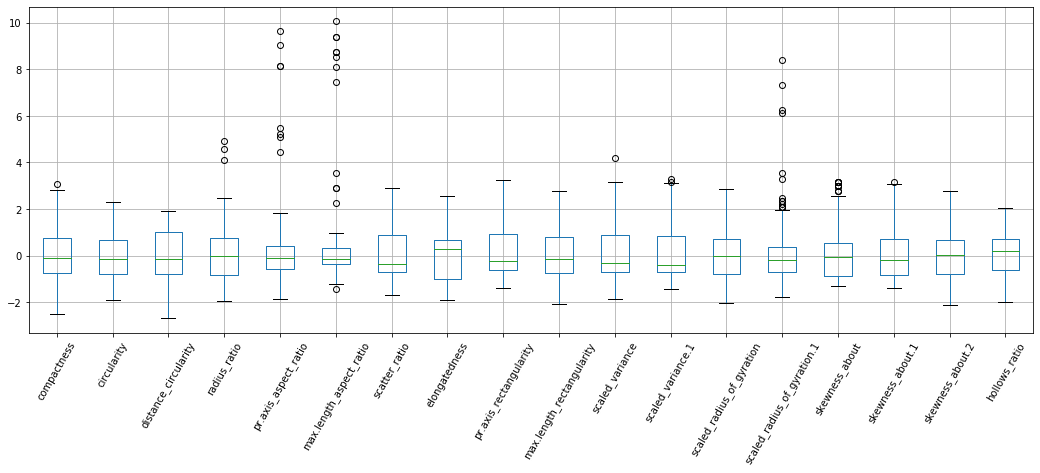

In [51]:
#z-scaled box plot
from scipy.stats import zscore
plt.figure(figsize=(18,6))
data.drop('class', axis=1).apply(zscore).boxplot(rot=60)
plt.show()

Outlier treatment is required. Setting it to IQR*1.5 cut off

In [0]:
from numpy import percentile

def handle_outliers(df, columns):
    for col in columns:
        # calculate interquartile range
        q25, q50, q75 = percentile(df[col], 25), percentile(df[col], 50), percentile(df[col], 75)
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        lower_outliers = [x for x in df[col] if x < lower]
        upper_outliers = [x for x in df[col] if x > upper]
        if len(lower_outliers)>0:
            df[col] = df[col].replace(lower_outliers, lower)
        if len(upper_outliers)>0:
            df[col] = df[col].replace(upper_outliers, upper)
    return df

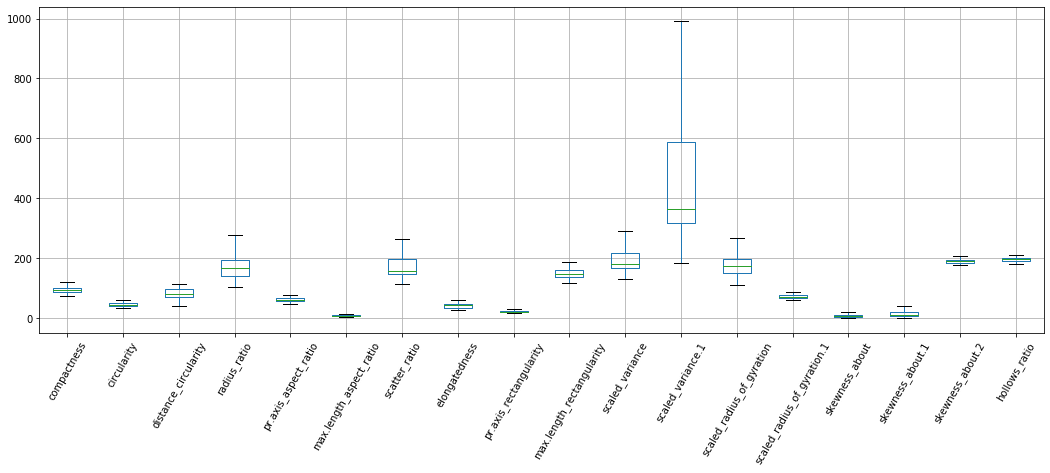

In [53]:
data = handle_outliers(data, data.drop('class', axis=1).columns)
plt.figure(figsize=(18,6))
data.drop('class', axis=1).boxplot(rot=60)
plt.show()

Outliers are now removed completely

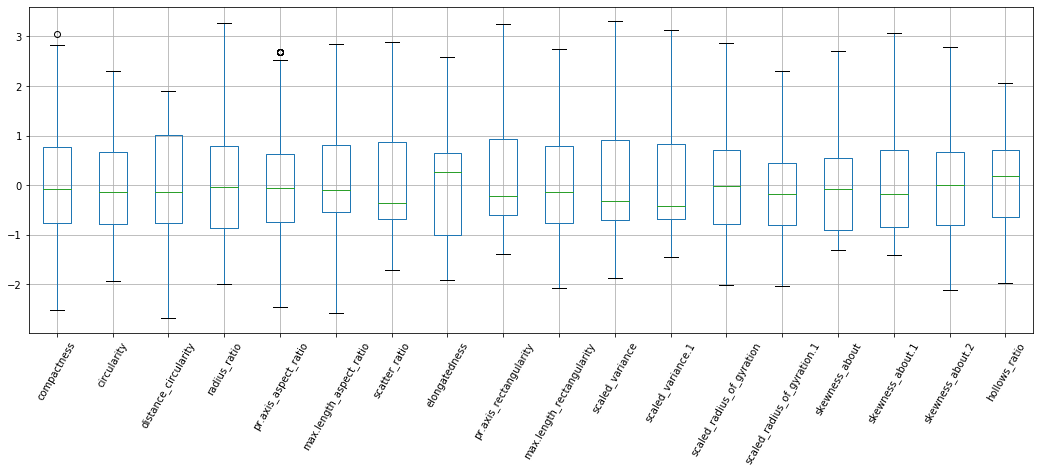

In [54]:
#First apply zscore scaling for the data
data_z = data.drop('class', axis=1).apply(zscore)
plt.figure(figsize=(18,6))
data_z.boxplot(rot=60)
plt.show()

In [0]:
data_z['class'] = data['class']

Data is in a good shape to perform further analysis

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [56]:
data['class'].value_counts()

1    427
0    213
2    199
Name: class, dtype: int64

In [0]:
#Check for high correlating items
corr = data_z.corr()

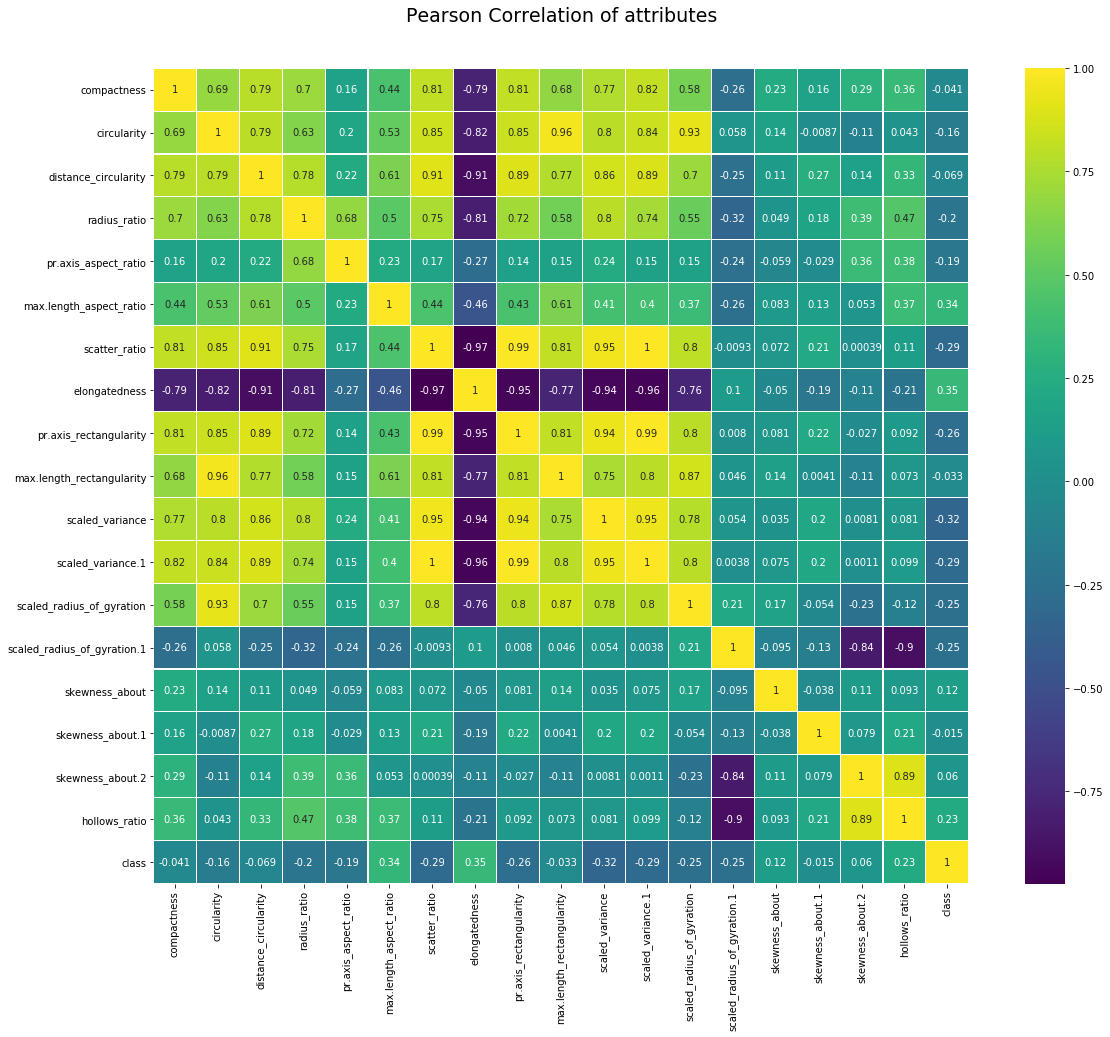

In [58]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(20,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [59]:
corr_columns = pd.DataFrame(((abs(corr) > 0.9).sum()-1), columns=['CorrelatingFeatures']).sort_values('CorrelatingFeatures', ascending=False)
corr_columns = corr_columns[corr_columns['CorrelatingFeatures'] > 0]
corr_columns

CorrelatingFeatures
scatter_ratio                                  5
elongatedness                                  5
pr.axis_rectangularity                         4
scaled_variance                                4
scaled_variance.1                              4
distance_circularity                           2
circularity                                    2
max.length_rectangularity                      1
hollows_ratio                                  1
scaled_radius_of_gyration                      1
scaled_radius_of_gyration.1                    1

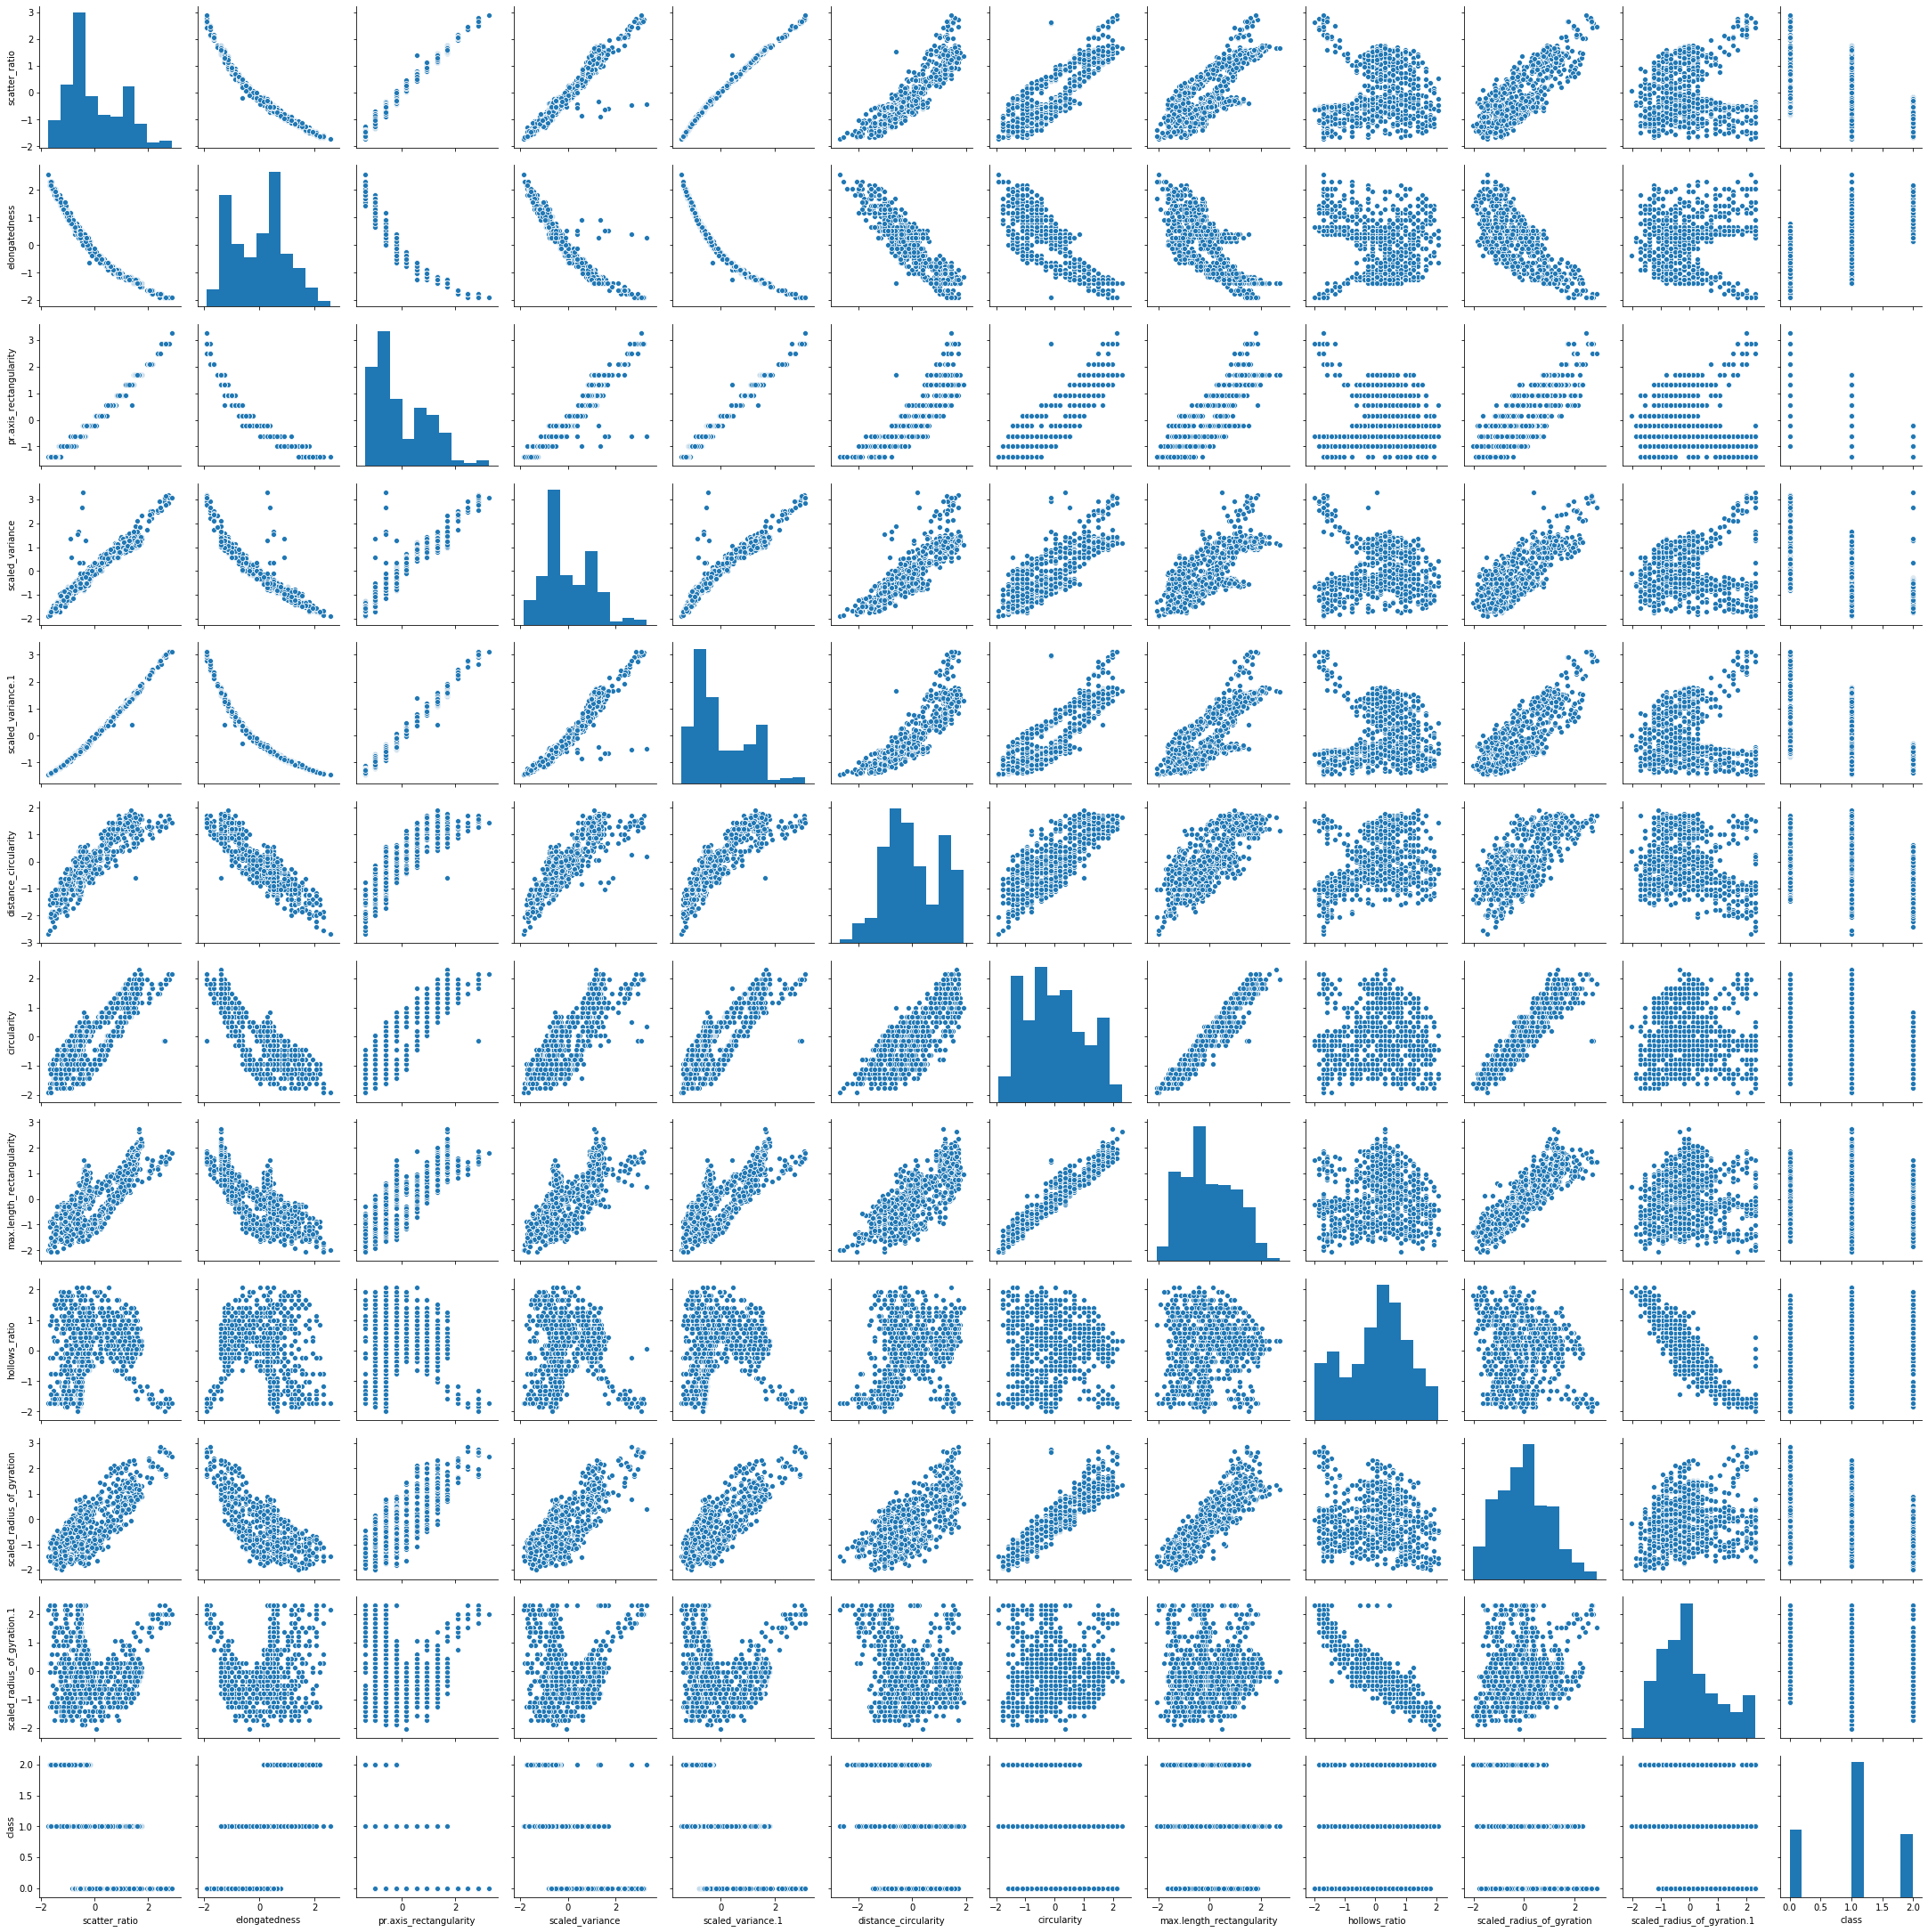

In [60]:
sns.pairplot(data_z[np.append(corr_columns.index, 'class')])
plt.show()

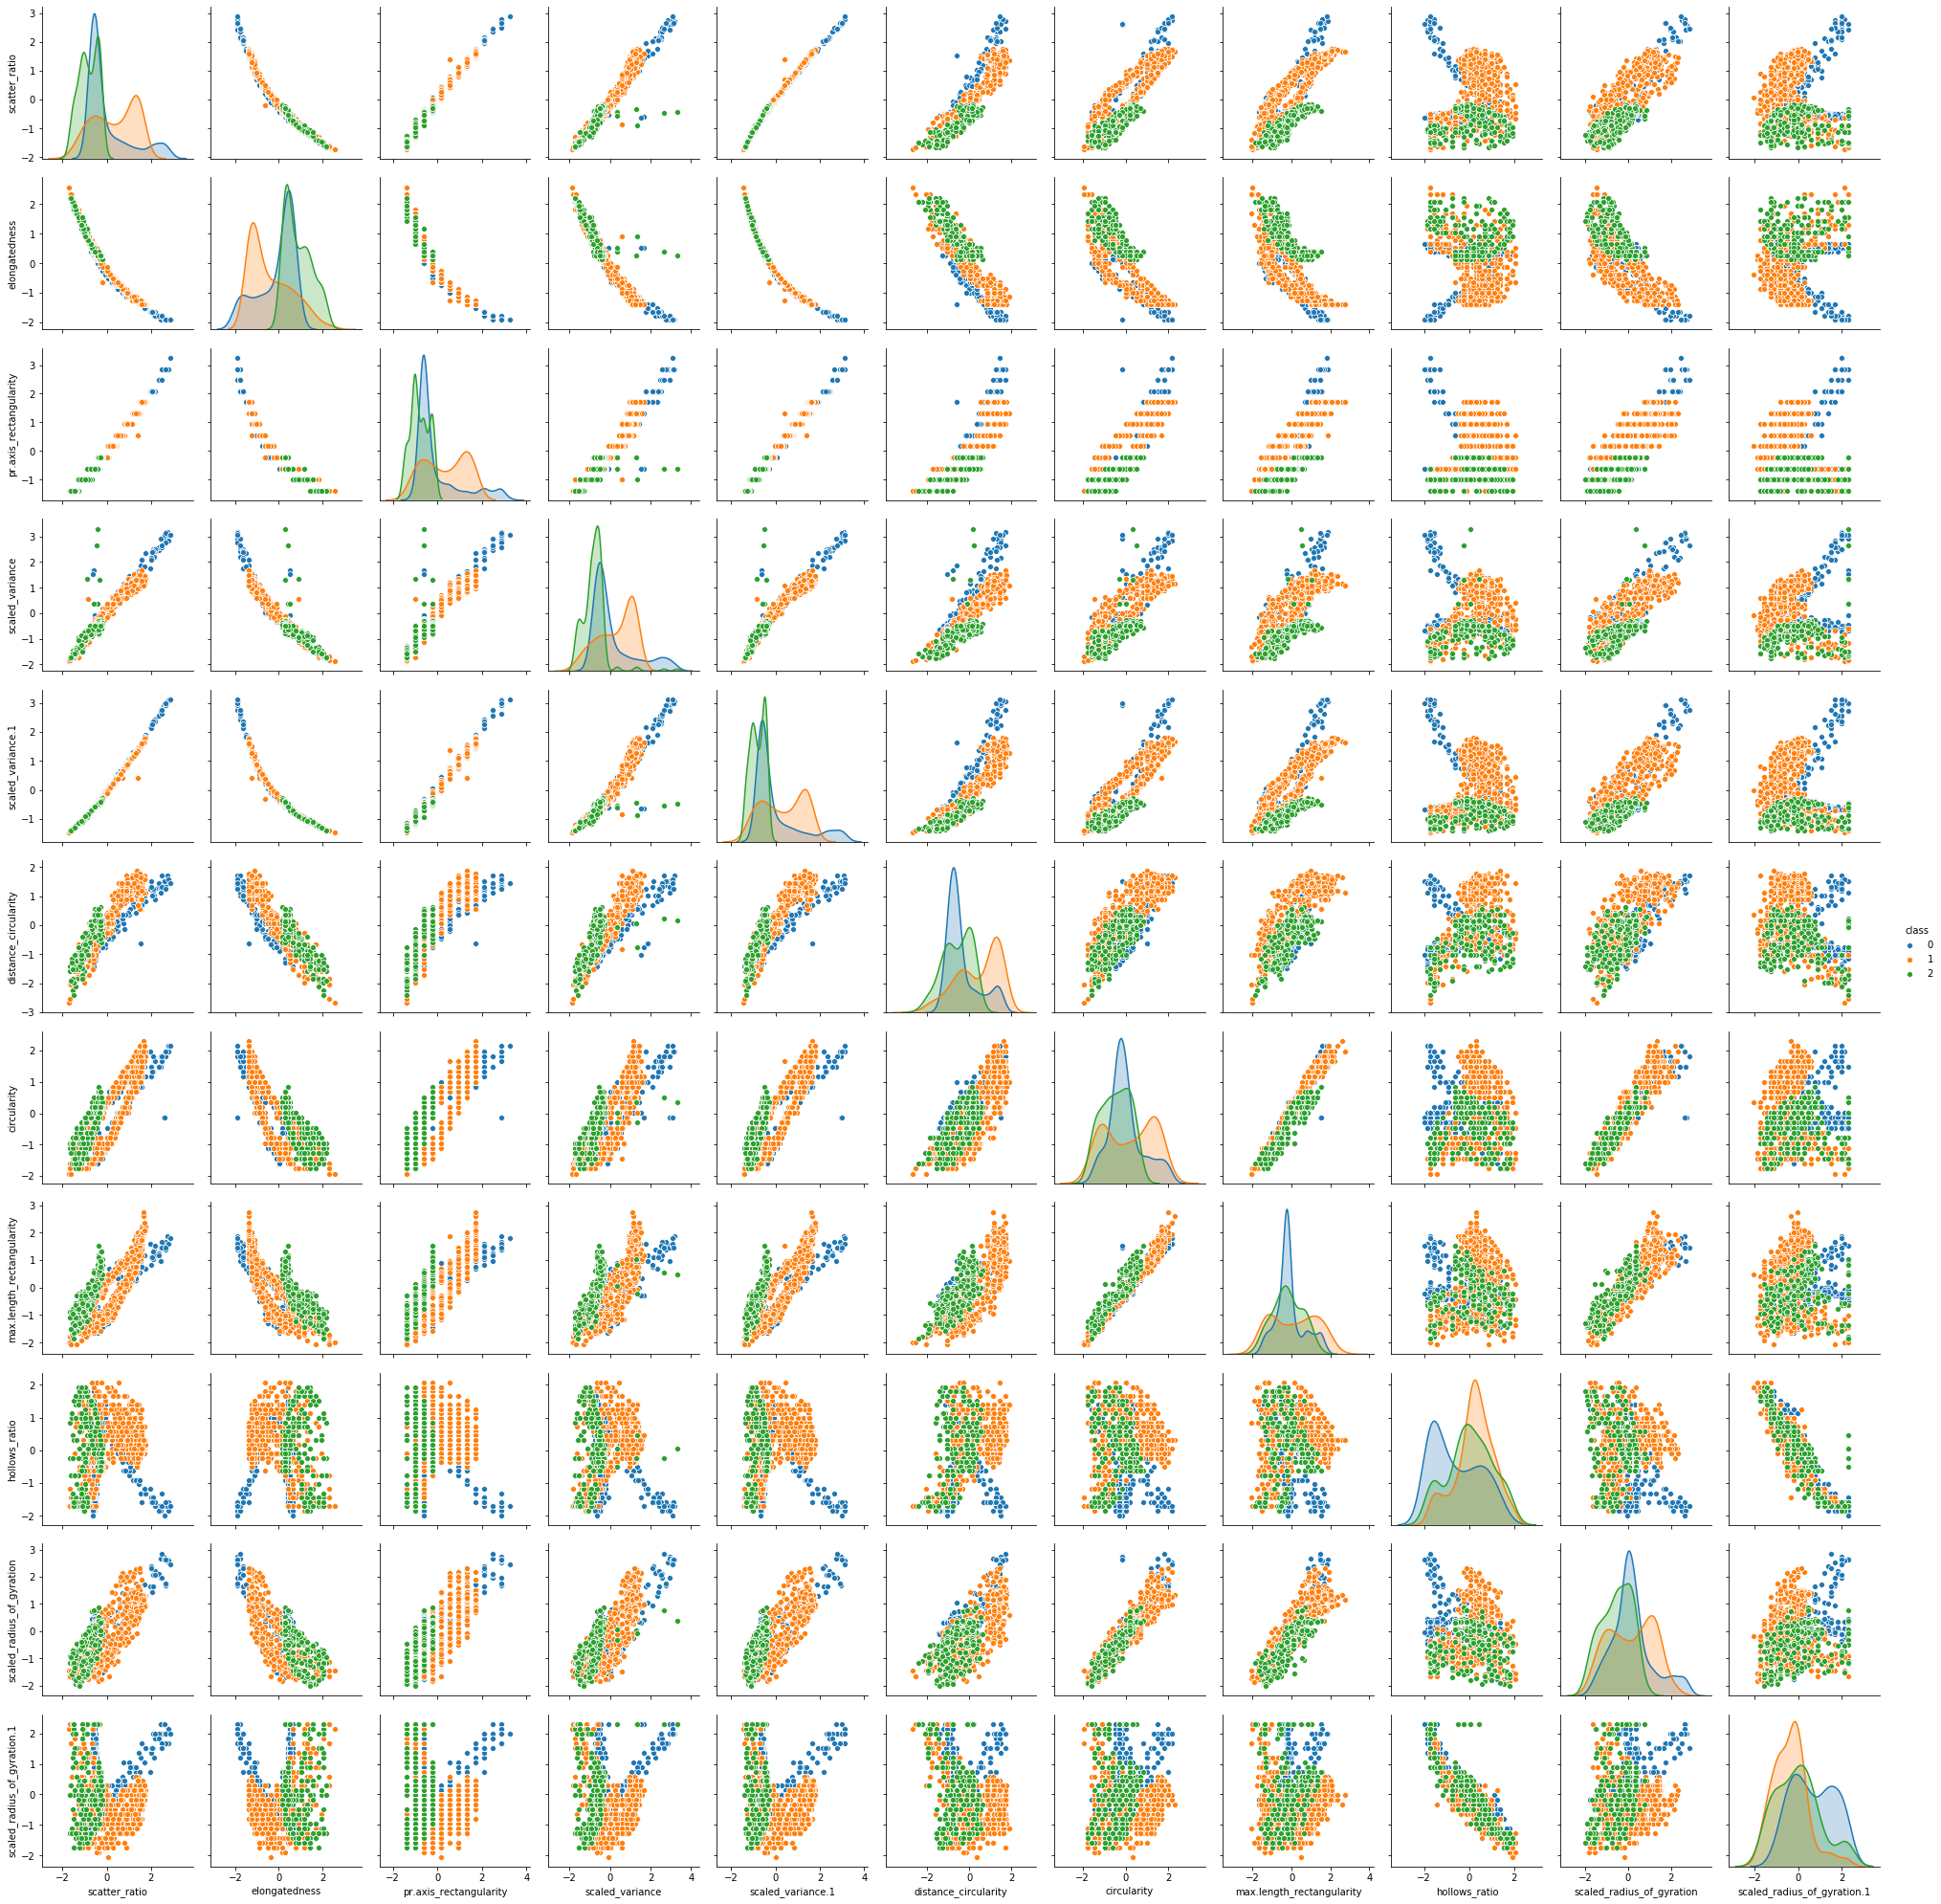

In [61]:
sns.pairplot(data_z[np.append(corr_columns.index, 'class')], hue='class')
plt.show()

Very strong linear coorelation seen with the following
1. scatter_ratio and elongatedness
2. scatter_ratio and scaled_variance
3. scatter_ratio and scaled_variance.1
4. elongatedness and scaled_variance
5. scaled_variance.1 and pr.axis_rectangularity

6. hollows_ratio does not seem to offer good seperation 

Further evaluation on if all these features are required or some can be droped to be done

In [0]:
cols_to_be_analysed = ['scatter_ratio', 'elongatedness', 'scaled_variance', 'scaled_variance.1', 'pr.axis_rectangularity', 'hollows_ratio']

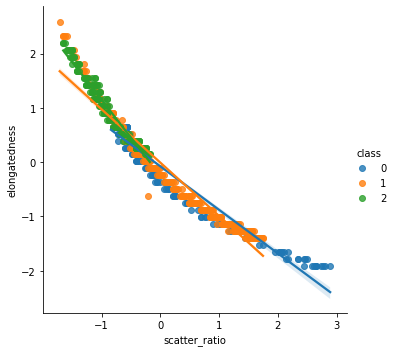

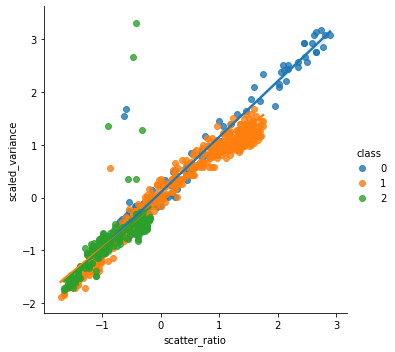

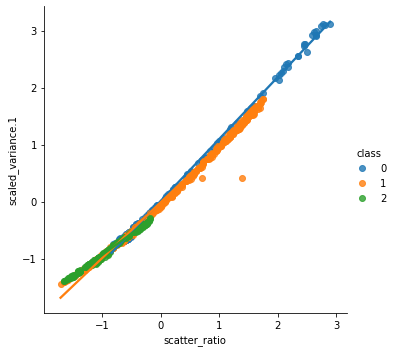

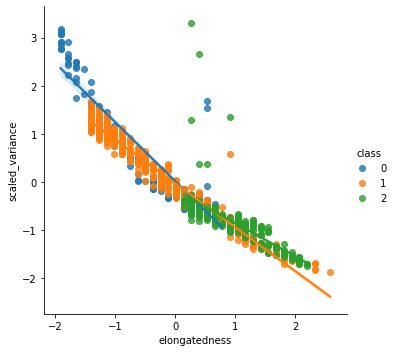

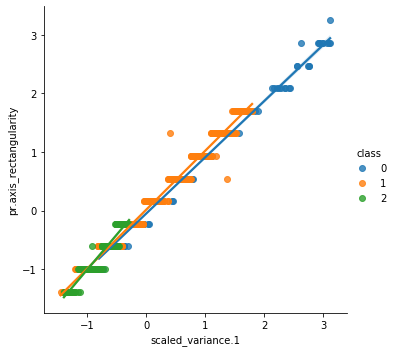

In [63]:
#Looking at some pair plots in detail

sns.lmplot('scatter_ratio', 'elongatedness', data=data_z, hue='class', fit_reg=True)
sns.lmplot('scatter_ratio', 'scaled_variance', data=data_z, hue='class', fit_reg=True)
sns.lmplot('scatter_ratio', 'scaled_variance.1', data=data_z, hue='class', fit_reg=True)
sns.lmplot('elongatedness', 'scaled_variance', data=data_z, hue='class', fit_reg=True)
sns.lmplot('scaled_variance.1', 'pr.axis_rectangularity', data=data_z, hue='class', fit_reg=True)
plt.show()

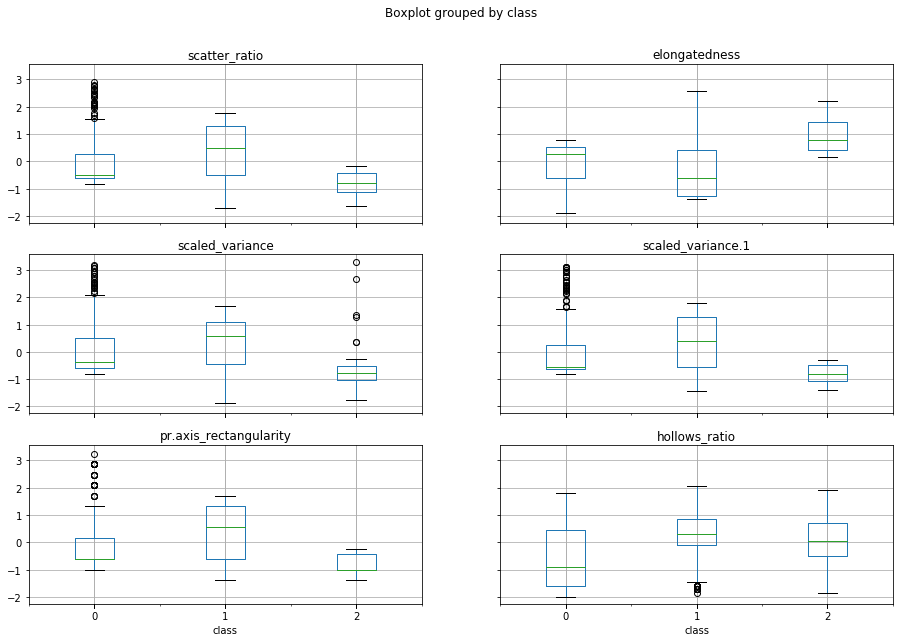

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('')
data_z[np.append(cols_to_be_analysed, 'class')].boxplot(column=cols_to_be_analysed, by='class', ax=ax)
plt.show()

From the analysis it is clear that only one feature can be retained and others can be dropped as there is high correlation present between them. Choosing elongatedness to be retained since it has no outliers and clear seperation of means
Choosing hollows_ratio to be retained since there is difference seen between 3 classes in box plot


In [0]:
#elongatedness
cols_to_be_dropped = ['scatter_ratio', 'scaled_variance', 'scaled_variance.1', 'pr.axis_rectangularity']
data_z.drop(cols_to_be_dropped, axis=1, inplace=True)

# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [0]:
y = data_z['class']
data_z.drop('class', axis=1, inplace=True)

In [67]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_z.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00119332  0.68744511  0.78977022  0.70203252  0.16151376  0.43741472
  -0.78827799  0.67644266  0.58563881 -0.26132081  0.23309118  0.16054543
   0.29249974  0.35944425]
 [ 0.68744511  1.00119332  0.7935498   0.63321253  0.19689588  0.52566461
  -0.82171947  0.9637721   0.92783543  0.05828136  0.14492924 -0.00875914
  -0.11057925  0.04262241]
 [ 0.78977022  0.7935498   1.00119332  0.78221938  0.22517291  0.61112277
  -0.91179202  0.77371849  0.70521854 -0.24828221  0.1114416   0.26944505
   0.14228838  0.33030588]
 [ 0.70203252  0.63321253  0.78221938  1.00119332  0.67940357  0.49733276
  -0.80740238  0.57684352  0.54655275 -0.32478081  0.04919904  0.18094683
   0.38581174  0.47481901]
 [ 0.16151376  0.19689588  0.22517291  0.67940357  1.00119332  0.22811989
  -0.2728185   0.1473312   0.1476129  -0.24168347 -0.05927175 -0.02891578
   0.36444718  0.38491244]
 [ 0.43741472  0.52566461  0.61112277  0.49733276  0.22811989  1.00119332
  -0.45616263  0.60961347  0.37

In [68]:
cov_matrix.shape

(14, 14)

In [0]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [70]:
# Step 3- Check the variance and cummulative variance of each eigen vector
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print("Variance\n", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance\n", cum_var_exp)

Variance
 [44.42991026280056, 22.521074103989477, 8.298955902748178, 7.952712265291561, 5.576902505582659, 4.983502575815546, 2.244147803071001, 1.5007395143177873, 0.8103192026961867, 0.5751879345402594, 0.38304022129855286, 0.3402389359536591, 0.24862017156589006, 0.13464860032865117]
Cumulative Variance
 [ 44.42991026  66.95098437  75.24994027  83.20265253  88.77955504
  93.76305762  96.00720542  97.50794493  98.31826414  98.89345207
  99.27649229  99.61673123  99.8653514  100.        ]


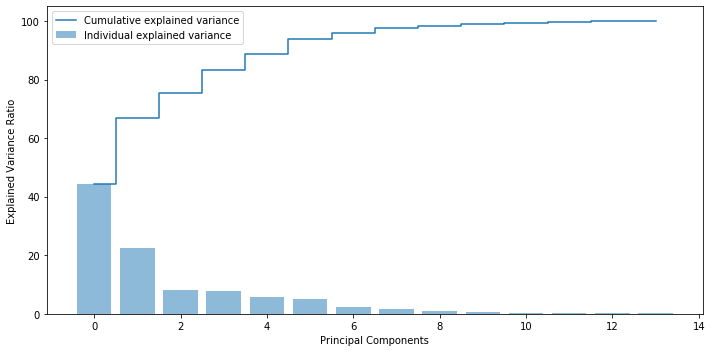

In [71]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

95% is achieved even by leaving 11 features out. So choosing only 7 components for the PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7, random_state=5)
pca.fit(data_z)
X_pca = pca.transform(data_z)
X_pca.shape

(839, 7)

In [73]:
pd.DataFrame(pca.components_, columns=data_z.columns)

compactness  circularity  ...  skewness_about.2  hollows_ratio
0    -0.338343    -0.351963  ...         -0.095892      -0.163337
1    -0.024547     0.221738  ...         -0.508436      -0.492885
2    -0.203226    -0.008870  ...         -0.049518      -0.072731
3     0.014947    -0.098000  ...         -0.141433      -0.008210
4     0.119347    -0.073259  ...          0.074583      -0.163688
5    -0.285825    -0.057539  ...         -0.255822      -0.002290
6     0.540442    -0.341426  ...         -0.116095      -0.186906

[7 rows x 14 columns]

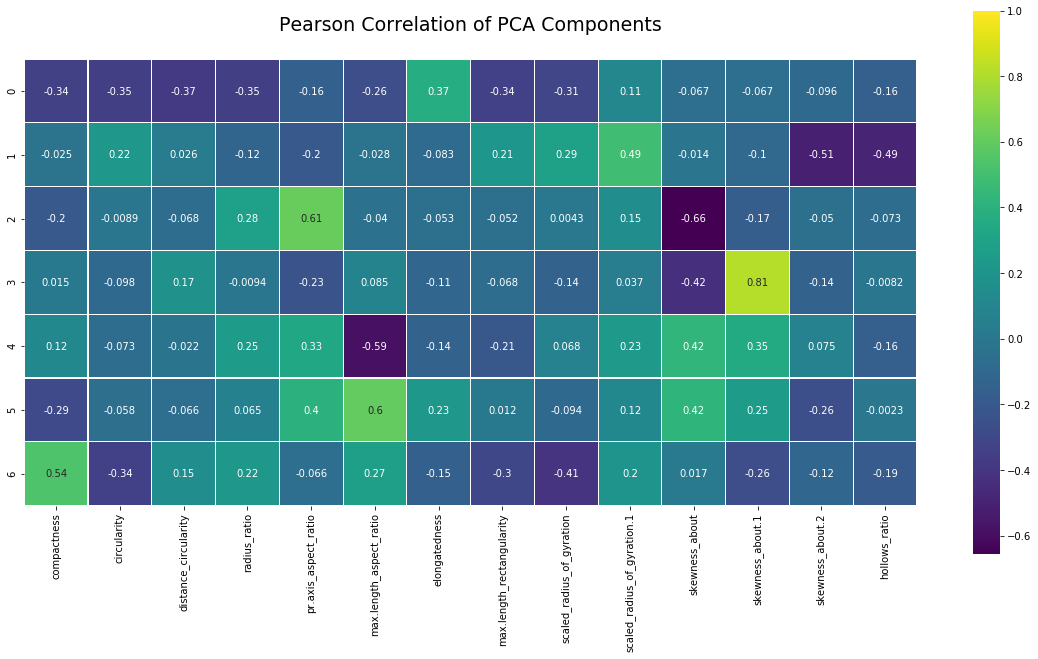

In [74]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(20,10))
plt.title('Pearson Correlation of PCA Components', y=1.05, size=19)
sns.heatmap(pd.DataFrame(pca.components_, columns=data_z.columns),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30,random_state=5)

In [76]:
from sklearn.svm import SVC
svc = SVC()
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Hyper parameters to be used in grid search cv are kernel with 'rbf' and 'linear' and  Penalty parameter C of the error term with 0.01, 0.05, 0.5 and 1

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [0]:
param_grid = {'kernel': ('rbf', 'linear'),
             'C': (0.01, 0.05, 0.5, 1)}

In [0]:
gs = GridSearchCV(svc, param_grid, cv=20)

In [80]:
gs.fit(X_train, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.05, 0.5, 1),
                         'kernel': ('rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
gs.best_params_

{'C': 1, 'kernel': 'rbf'}

In [82]:
gs.cv_results_['params']

[{'C': 0.01, 'kernel': 'rbf'},
 {'C': 0.01, 'kernel': 'linear'},
 {'C': 0.05, 'kernel': 'rbf'},
 {'C': 0.05, 'kernel': 'linear'},
 {'C': 0.5, 'kernel': 'rbf'},
 {'C': 0.5, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'linear'}]

In [83]:
gs.cv_results_['mean_test_score']

array([0.4887931 , 0.76431034, 0.64706897, 0.79356322, 0.8891954 ,
       0.81068966, 0.89431034, 0.80890805])

In [84]:
X_train.shape

(587, 7)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [86]:
num_folds = 50
kfold = KFold(n_splits=num_folds, random_state=5)
#instantiate the model which is the proposed model from the GridSearchCV [{'C': 1, 'kernel': 'rbf'}]
svc = SVC(C=1, kernel = 'rbf')
results = cross_val_score(svc, X_pca, y, cv=kfold)
pd.DataFrame(results, columns=['accuracy']).describe()

accuracy
count  50.000000
mean    0.904485
std     0.061441
min     0.764706
25%     0.875000
50%     0.882353
75%     0.941176
max     1.000000

In [87]:
results

array([0.94117647, 0.82352941, 0.94117647, 1.        , 0.94117647,
       0.94117647, 0.88235294, 0.94117647, 0.88235294, 1.        ,
       0.94117647, 1.        , 0.88235294, 0.88235294, 1.        ,
       0.76470588, 0.88235294, 0.88235294, 1.        , 0.82352941,
       0.88235294, 0.82352941, 0.94117647, 0.88235294, 0.94117647,
       0.88235294, 0.82352941, 0.94117647, 0.94117647, 0.94117647,
       0.88235294, 0.82352941, 0.94117647, 1.        , 0.76470588,
       0.88235294, 0.94117647, 0.94117647, 0.88235294, 0.8125    ,
       0.9375    , 1.        , 0.9375    , 0.875     , 0.875     ,
       0.9375    , 0.875     , 0.8125    , 0.875     , 0.875     ])

In [88]:
print("Accuracy of the model is %.3f%% with a deviation of %.3f%%" %(results.mean()*100, results.std()*100))

Accuracy of the model is 90.449% with a deviation of 6.082%


In [0]:
svc = SVC(C=1, kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)

In [0]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

In [91]:
print("Confusion matrix")
print(conf_matrix)
print("F1 score, Precision and Recall")
print(metrics.classification_report(y_test, y_pred_test))
print("Testing Accuracy", svc.score(X_test, y_test))
i = 0
while i < 3:
    j = 0
    print("Actual is ", le.classes_[i])
    while j < 3:
        if i == j:
            #This is True Positive For corresponding class i
            print("OK:  Predicted as ", le.classes_[j] , "is", conf_matrix[i,j])
        elif i > j:
            #
            print("NOK: Predicted as ", le.classes_[j] , "is", conf_matrix[i,j])
        else:
            #
            print("NOK: Predicted as ", le.classes_[j] , "is", conf_matrix[i,j])
        j = j+1
    print("")
    i = i+1 

Confusion matrix
[[ 48   1   4]
 [  2 132   6]
 [  4   7  48]]
F1 score, Precision and Recall
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.94      0.94      0.94       140
           2       0.83      0.81      0.82        59

    accuracy                           0.90       252
   macro avg       0.89      0.89      0.89       252
weighted avg       0.90      0.90      0.90       252

Testing Accuracy 0.9047619047619048
Actual is  bus
OK:  Predicted as  bus is 48
NOK: Predicted as  car is 1
NOK: Predicted as  van is 4

Actual is  car
NOK: Predicted as  bus is 2
OK:  Predicted as  car is 132
NOK: Predicted as  van is 6

Actual is  van
NOK: Predicted as  bus is 4
NOK: Predicted as  car is 7
OK:  Predicted as  van is 48

